In [4]:
!pip install sklearn --ignore-installed

     |████████████████████████████████| 23.1 MB 1.6 MB/s 
     |████████████████████████████████| 303 kB 55.8 MB/s 
     |████████████████████████████████| 28.5 MB 50 kB/s 
     |████████████████████████████████| 15.7 MB 197 kB/s 
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=8e5c072f4757df28ea1700178c70f0713db4206904f6e10a05f6545c65cd2f2b
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires numpy~=1.19.2, but you have numpy 1.21.2 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [4]:
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
plt.style.use('ggplot')
sns.set_palette('tab10')
sns.set_style('whitegrid')

In [7]:
sklearn.__version__

'1.0'

In [8]:
df = pd.read_csv('/content/drive/MyDrive/card_transactions.csv')

In [9]:
df.head()

,customer_id,balance_account,purchases_amount,paid_advance,full_purchases,balance_frequency_update,installments,purchases_frequency,full_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,min_payments,full_payment_prc
0,tGEg8fT2eCgVxdwS,9.298409,107.60,0.000000,0.00,0.909091,107.6,0.909091,0.000000,0.818182,0.000000,0,10,1000.0,11,89.868853,89.711672,0.428571
1,stEDu20sSKOXomjg,52.666422,150.30,0.000000,0.00,1.000000,150.3,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,6,54.722514,82.955180,0.000000
2,CEB2blrN3b88GsRe,1360.795674,0.00,462.861443,0.00,1.000000,0.0,0.000000,0.000000,0.000000,0.272727,6,0,1500.0,11,303.031979,443.781316,0.000000
3,0N0eBl8ySaZThxKE,2021.641161,363.18,0.000000,363.18,1.000000,0.0,1.000000,1.000000,0.000000,0.000000,0,13,2000.0,12,704.240770,795.859808,0.000000
4,6NLauoHUwtwOv4Wy,22.322374,95.00,1162.045833,95.00,0.363636,0.0,0.083333,0.083333,0.000000,0.166667,3,1,2500.0,12,4094.261427,40.142262,0.000000


# Data cleaning

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   customer_id                       8500 non-null   object 
 1   balance_account                   8500 non-null   float64
 2   purchases_amount                  8500 non-null   float64
 3   paid_advance                      8500 non-null   float64
 4   full_purchases                    8500 non-null   float64
 5   balance_frequency_update          8500 non-null   float64
 6   installments                      8500 non-null   float64
 7   purchases_frequency               8500 non-null   float64
 8   full_purchases_frequency          8500 non-null   float64
 9   purchases_installments_frequency  8500 non-null   float64
 10  cash_advance_frequency            8500 non-null   float64
 11  nr_cash_advances                  8500 non-null   int64  
 12  nr_pur

**Dataset description:**
- 8500 rows = 8500 customers
- customer_id + 17 features
<br>

**Feature description:**
- customer_id : id of the credit card holder
- balance_account : balance amount left in the account to make purchases at the end of the 6-month period
- purchases_amount : amount of purchases made from account (total?). That is, without using the cash in advance method??
- paid_advance : number of transactions made with “Cash in Advance” method. Cash advances are short term loans taken against your credit line on your credit card.
- full_purchases : maximum purchase amount done in full payment
- balance_frequency_update : how frequently the balance has been updated, score between 0 and 1 (1 = frequently - updated, 0 = not frequently updated)
- installments : amount of purchases done in installments
- purchases_frequency : how frequently the purchases are being made, score between 0 and 1 (1 = frequently - - purchased, 0 = not frequently purchased)
- full_purchases_frequency : how frequently purchases are happening in full payment (1 = frequently purchased, - 0 = not frequently purchased)
- purchases_installments_frequency : how frequently purchases in installments are being done (1 = frequently - done, 0 = not frequently done)
- cash_advance_frequency : how frequently the cash in advance being paid. Cash advances are short term loans taken against your credit line on your credit card.
- nr_cash_advances : cash in advance given by the user
- nr_purchases : number of purchase transactions made
- credit_limit : limit of credit card for user
- fixed_rate_period : duration of fixed interest rate of credit card service for user (in months)
- payments : amount of payment done by user. **Total?**
- min_payments : minimum amount of payments made by user
- full_payment_prc : percent of full payment paid by user

In [11]:
# Missing values
# credit_limit: 1
# min_payments: 298

df[df['credit_limit'].isna()]

,customer_id,balance_account,purchases_amount,paid_advance,full_purchases,balance_frequency_update,installments,purchases_frequency,full_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,min_payments,full_payment_prc
7898,c2AkRIIj9f7hgiXZ,18.400472,0.0,186.853063,0.0,0.166667,0.0,0.0,0.0,0.0,0.166667,1,0,NaN,6,9.040017,14.418723,0.0


In [12]:
# it looks like most of the null min_payments also have payments=0
# (which makes sense!). Actually 227 among 298.

df[df['min_payments'].isna()]

,customer_id,balance_account,purchases_amount,paid_advance,full_purchases,balance_frequency_update,installments,purchases_frequency,full_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,min_payments,full_payment_prc
24,Hik1ahI9PjnV7wHy,463.071440,1817.84,0.000000,1817.84,1.000000,0.0,0.333333,0.333333,0.000000,0.000000,0,4,6000.0,12,0.000000,NaN,0.0
27,xErcXVe5RtT8Z558,28.329892,292.59,0.000000,292.59,1.000000,0.0,1.000000,1.000000,0.000000,0.000000,0,12,5000.0,12,0.000000,NaN,0.0
29,C9WDDshw5YIAvH0c,0.000000,240.10,0.000000,0.00,0.000000,240.1,0.583333,0.000000,0.583333,0.000000,0,7,2500.0,12,0.000000,NaN,0.0
38,sYAP5BgHHjmvJ5XO,61.463647,0.00,989.053104,0.00,0.166667,0.0,0.000000,0.000000,0.000000,0.166667,2,0,1200.0,6,0.000000,NaN,0.0
56,ho8zNMNjqV2lBy0t,253.143106,0.00,3351.385591,0.00,0.142857,0.0,0.000000,0.000000,0.000000,0.142857,3,0,5000.0,7,0.000000,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8395,hFGLaz0A3lTtvK43,212.306148,0.70,1922.593600,0.70,0.181818,0.0,0.083333,0.083333,0.000000,0.166667,3,1,3500.0,12,0.000000,NaN,0.0
8422,KBWRrBwKqKvGKzjv,253.083620,0.00,1654.916972,0.00,0.181818,0.0,0.000000,0.000000,0.000000,0.083333,1,0,1800.0,12,0.000000,NaN,0.0
8460,zVzc7CzWYPj6QN71,147.418569,1074.00,0.000000,1074.00,0.181818,0.0,0.083333,0.083333,0.000000,0.000000,0,2,5500.0,12,0.000000,NaN,0.0
8490,qiNQQyNu3YM9PRwP,0.000000,232.20,0.000000,0.00,0.000000,232.2,1.000000,0.000000,1.000000,0.000000,0,12,1500.0,12,415.603589,NaN,0.0


In [13]:
# look at a few customers for which min_payments is not null for comparison
df[~df['min_payments'].isna()].head()

,customer_id,balance_account,purchases_amount,paid_advance,full_purchases,balance_frequency_update,installments,purchases_frequency,full_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,min_payments,full_payment_prc
0,tGEg8fT2eCgVxdwS,9.298409,107.60,0.000000,0.00,0.909091,107.6,0.909091,0.000000,0.818182,0.000000,0,10,1000.0,11,89.868853,89.711672,0.428571
1,stEDu20sSKOXomjg,52.666422,150.30,0.000000,0.00,1.000000,150.3,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,6,54.722514,82.955180,0.000000
2,CEB2blrN3b88GsRe,1360.795674,0.00,462.861443,0.00,1.000000,0.0,0.000000,0.000000,0.000000,0.272727,6,0,1500.0,11,303.031979,443.781316,0.000000
3,0N0eBl8ySaZThxKE,2021.641161,363.18,0.000000,363.18,1.000000,0.0,1.000000,1.000000,0.000000,0.000000,0,13,2000.0,12,704.240770,795.859808,0.000000
4,6NLauoHUwtwOv4Wy,22.322374,95.00,1162.045833,95.00,0.363636,0.0,0.083333,0.083333,0.000000,0.166667,3,1,2500.0,12,4094.261427,40.142262,0.000000


In [14]:
print(df[(df['min_payments'].isna()) & (df['payments'] == 0)].shape)
print(df[(df['min_payments'].isna()) & (df['payments'] != 0)].shape)

(227, 18)
(71, 18)


In [15]:
# customers with min_payments null but payments >0 make little sense.
# Data collection error?
df[(df['min_payments'].isna()) & (df['payments'] != 0)].head()

,customer_id,balance_account,purchases_amount,paid_advance,full_purchases,balance_frequency_update,installments,purchases_frequency,full_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,min_payments,full_payment_prc
68,zZ6IZlH0ay9ywpg9,0.000000,0.00,147.241855,0.0,0.000000,0.00,0.0,0.0,0.0,0.090909,1,0,500.0,11,667.921811,NaN,0.0
102,j7SKYdhyuESZxyXu,3.574463,576.00,0.000000,0.0,0.818182,576.00,1.0,0.0,1.0,0.000000,0,12,1000.0,12,498.788091,NaN,0.0
107,7WdEyp0VDyVj46Np,0.000000,147.00,0.000000,0.0,0.000000,147.00,1.0,0.0,1.0,0.000000,0,12,2500.0,12,152.109132,NaN,0.0
137,PgGlmFf5owM4P5KK,0.000000,609.00,0.000000,0.0,0.000000,609.00,1.0,0.0,1.0,0.000000,0,12,2500.0,12,893.429001,NaN,0.0
145,u3fyLifrcl27laZF,1.600479,513.24,0.000000,0.0,0.181818,513.24,1.0,0.0,1.0,0.000000,0,12,2500.0,12,363.735397,NaN,0.0


Doing the cleaning:

In [16]:
df_clean = df.copy()

# Replace min_payments with 0 for 221 customers with missing min_payments and payments = 0
df_clean.loc[(df_clean['min_payments'].isna()) & (df_clean['payments'] == 0), 'min_payments'] = 0

# Drop 71 cust with missing min_payments payments > 0
df_clean = df_clean.loc[~((df_clean['min_payments'].isna()) & (df_clean['payments'] != 0)), :]

# Drop 1 customer with missing credit_limit
df_clean = df_clean.loc[~df_clean['credit_limit'].isna()]

In [17]:
# In the end, we droped a total of 72 customers
# The cleaned dataset has no missing values

print(df_clean.isna().sum().sum())
df_clean.shape

0


(8428, 18)

# Data exploration

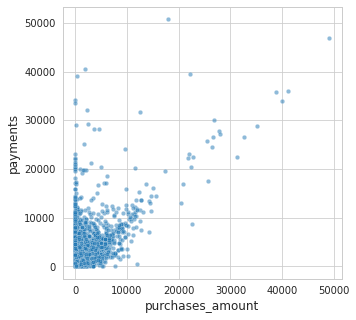

In [18]:
# try to understand the difference between purchases_amount and payments

fig, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(
    x='purchases_amount', y='payments', data=df, alpha=.5, s=20,
    ax=ax
)
plt.show()

In [19]:
df[(df['purchases_amount'] == 0) & (df['payments'] > 0)]

,customer_id,balance_account,purchases_amount,paid_advance,full_purchases,balance_frequency_update,installments,purchases_frequency,full_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,min_payments,full_payment_prc
2,CEB2blrN3b88GsRe,1360.795674,0.0,462.861443,0.0,1.000000,0.0,0.0,0.0,0.0,0.272727,6,0,1500.0,11,303.031979,443.781316,0.000000
7,fDoLh1FTtFMuu3xs,4788.283283,0.0,437.808586,0.0,1.000000,0.0,0.0,0.0,0.0,0.166667,2,0,5000.0,12,823.840717,1934.821741,0.000000
9,k2GbzBNCo0TQmwaw,1641.251218,0.0,2990.165538,0.0,0.727273,0.0,0.0,0.0,0.0,0.166667,4,0,3000.0,12,4399.723425,500.276155,0.142857
18,ZgZDmu1CQM3jqFB5,1630.620638,0.0,381.541722,0.0,1.000000,0.0,0.0,0.0,0.0,0.166667,2,0,2100.0,12,1117.714796,459.782873,0.000000
19,WHWy3OQxpYdblb4z,1200.937942,0.0,1981.157622,0.0,0.833333,0.0,0.0,0.0,0.0,0.500000,4,0,2000.0,6,152.106361,200.106261,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8485,I9sTV0H9yXXEFGfL,266.475852,0.0,1560.735908,0.0,0.272727,0.0,0.0,0.0,0.0,0.166667,2,0,1500.0,12,792.623374,226.586503,0.000000
8488,C0dhVaTQa4quWsBX,1606.567660,0.0,1173.530445,0.0,0.818182,0.0,0.0,0.0,0.0,0.250000,3,0,4500.0,12,3883.138519,638.672701,0.125000
8491,tN3pEIcj04loWHyP,1748.310383,0.0,157.152652,0.0,1.000000,0.0,0.0,0.0,0.0,0.083333,1,0,2000.0,12,538.443435,484.325120,0.000000
8495,zdVfd3CYHYBjf61b,1127.607606,0.0,271.093275,0.0,1.000000,0.0,0.0,0.0,0.0,0.083333,1,0,8500.0,12,662.387331,260.277533,0.000000


# Summary of findings after exploration
- 1876 customers with purchase_amount=0 and payments > 0. These correspond to customers who payed ONLY with the cash advance method.
- Cash advances should be profitable for the credit card company, since the interest on the loan is high. However, it can be risky if the customer defaults.
- 298 customers with null min_payments. Among them, 227 have payments=0 (which makes sense). Remaining 71 customers are data collection errors?



Strategy:
- For the 227/298 customers with min_payments=null and payments=0, replace min_payements with 0.
- Drop the remaining 71 cusotmers

Cleaned dataset:<br>
- We droped a total of 72 customers.
- The cleaned dataset has no missing values.

# Training data

In [20]:
X_train = df_clean.drop(columns='customer_id')
features = X_train.columns.to_list()

# Experiments:
1. Baseline: StandardScaler -> KMeans clustering
2. Improved: StandardScaler -> PCA -> KMeans

# Experiment 1: Baseline KMeans clustering

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

df_ex1 = df_clean.copy()

pipeline_base_kmean = Pipeline(steps=[
                                      ('scaler', StandardScaler()),
                                      ('clust', KMeans())
])

In [22]:
# Optimal number of clusters using an elbow plot
n_clusters = np.arange(2, 20, 1)
wcss = np.zeros_like(n_clusters)

for i, n_cluster in enumerate(n_clusters):
  pipeline_base_kmean.set_params(clust__n_clusters=n_cluster)
  pipeline_base_kmean.fit(X_train)
  wcss[i] = pipeline_base_kmean['clust'].inertia_

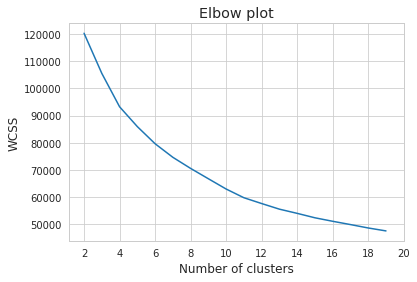

In [23]:
fig, ax = plt.subplots()
ax.plot(n_clusters, wcss)
ax.set(
    xlabel='Number of clusters',
    ylabel='WCSS',
    title='Elbow plot'
)
ax.set_xticks(list(range(2, 21, 2)))
plt.show()

Maybe 6-8 clusters is good, but it is not so clear.

In [24]:
pipeline_base_kmean.set_params(clust__n_clusters=8)
pipeline_base_kmean.fit(X_train)

df_ex1['label'] = pipeline_base_kmean['clust'].labels_
df_ex1['label'] = df_ex1['label'].astype('category')

In [25]:
df_ex1.head()

,customer_id,balance_account,purchases_amount,paid_advance,full_purchases,balance_frequency_update,installments,purchases_frequency,full_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,min_payments,full_payment_prc,label
0,tGEg8fT2eCgVxdwS,9.298409,107.60,0.000000,0.00,0.909091,107.6,0.909091,0.000000,0.818182,0.000000,0,10,1000.0,11,89.868853,89.711672,0.428571,2
1,stEDu20sSKOXomjg,52.666422,150.30,0.000000,0.00,1.000000,150.3,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,6,54.722514,82.955180,0.000000,6
2,CEB2blrN3b88GsRe,1360.795674,0.00,462.861443,0.00,1.000000,0.0,0.000000,0.000000,0.000000,0.272727,6,0,1500.0,11,303.031979,443.781316,0.000000,1
3,0N0eBl8ySaZThxKE,2021.641161,363.18,0.000000,363.18,1.000000,0.0,1.000000,1.000000,0.000000,0.000000,0,13,2000.0,12,704.240770,795.859808,0.000000,3
4,6NLauoHUwtwOv4Wy,22.322374,95.00,1162.045833,95.00,0.363636,0.0,0.083333,0.083333,0.000000,0.166667,3,1,2500.0,12,4094.261427,40.142262,0.000000,7


In [26]:
df_ex1['label'].value_counts()

1    2551
2    1901
7    1082
3    1018
4     870
6     587
0     389
5      30
Name: label, dtype: int64

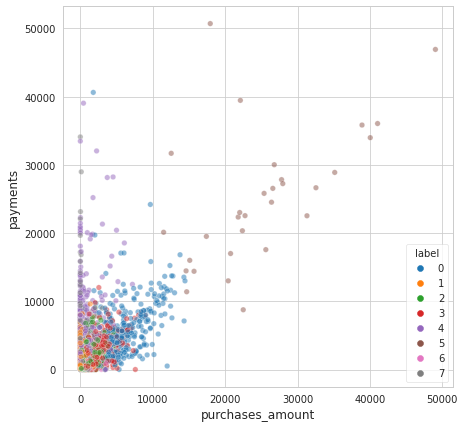

In [27]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.scatterplot(
    x='purchases_amount', y='payments', data=df_ex1, alpha=.5, s=30,
    ax=ax, hue='label'
)
plt.show()

In [28]:
# Group 2 captures most (61%) of the customer who use only cash advances
df_tmp = df_ex1[(df_ex1['purchases_amount'] == 0) & (df_ex1['payments'] > 0)]
print(len(df_tmp))
df_tmp['label'].value_counts(normalize=True)

1867


1    0.612748
4    0.203535
6    0.094269
7    0.089448
5    0.000000
3    0.000000
2    0.000000
0    0.000000
Name: label, dtype: float64

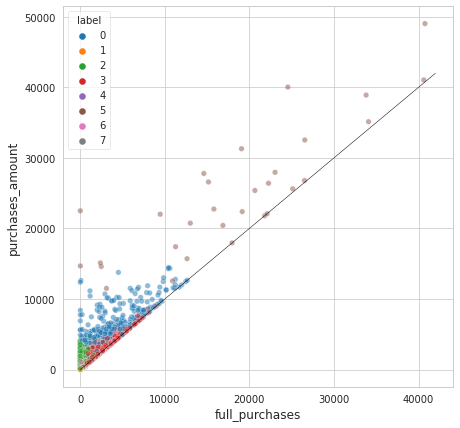

In [29]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.scatterplot(
    x='full_purchases', y='purchases_amount', data=df_ex1, alpha=.5, s=30,
    ax=ax, hue='label'
)
ax.plot([0, 42000], [0, 42000], '-', linewidth=.5, color='black', zorder=10)
plt.show()

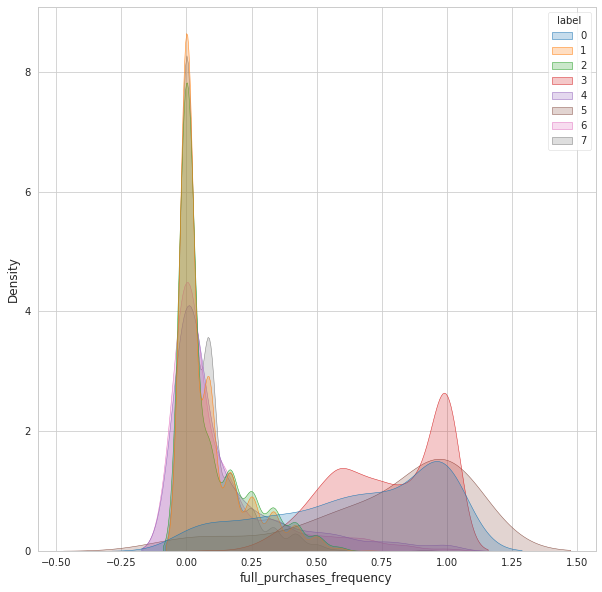

In [30]:
df_ex1_scaled = pd.DataFrame(StandardScaler().fit_transform(df_ex1.drop(columns='customer_id')), columns=df_ex1.drop(columns='customer_id').columns)
fig, ax = plt.subplots(figsize=(10, 10))
sns.kdeplot(data=df_ex1, x='full_purchases_frequency', hue='label', common_norm=False, shade=True, ax=ax)
plt.show()

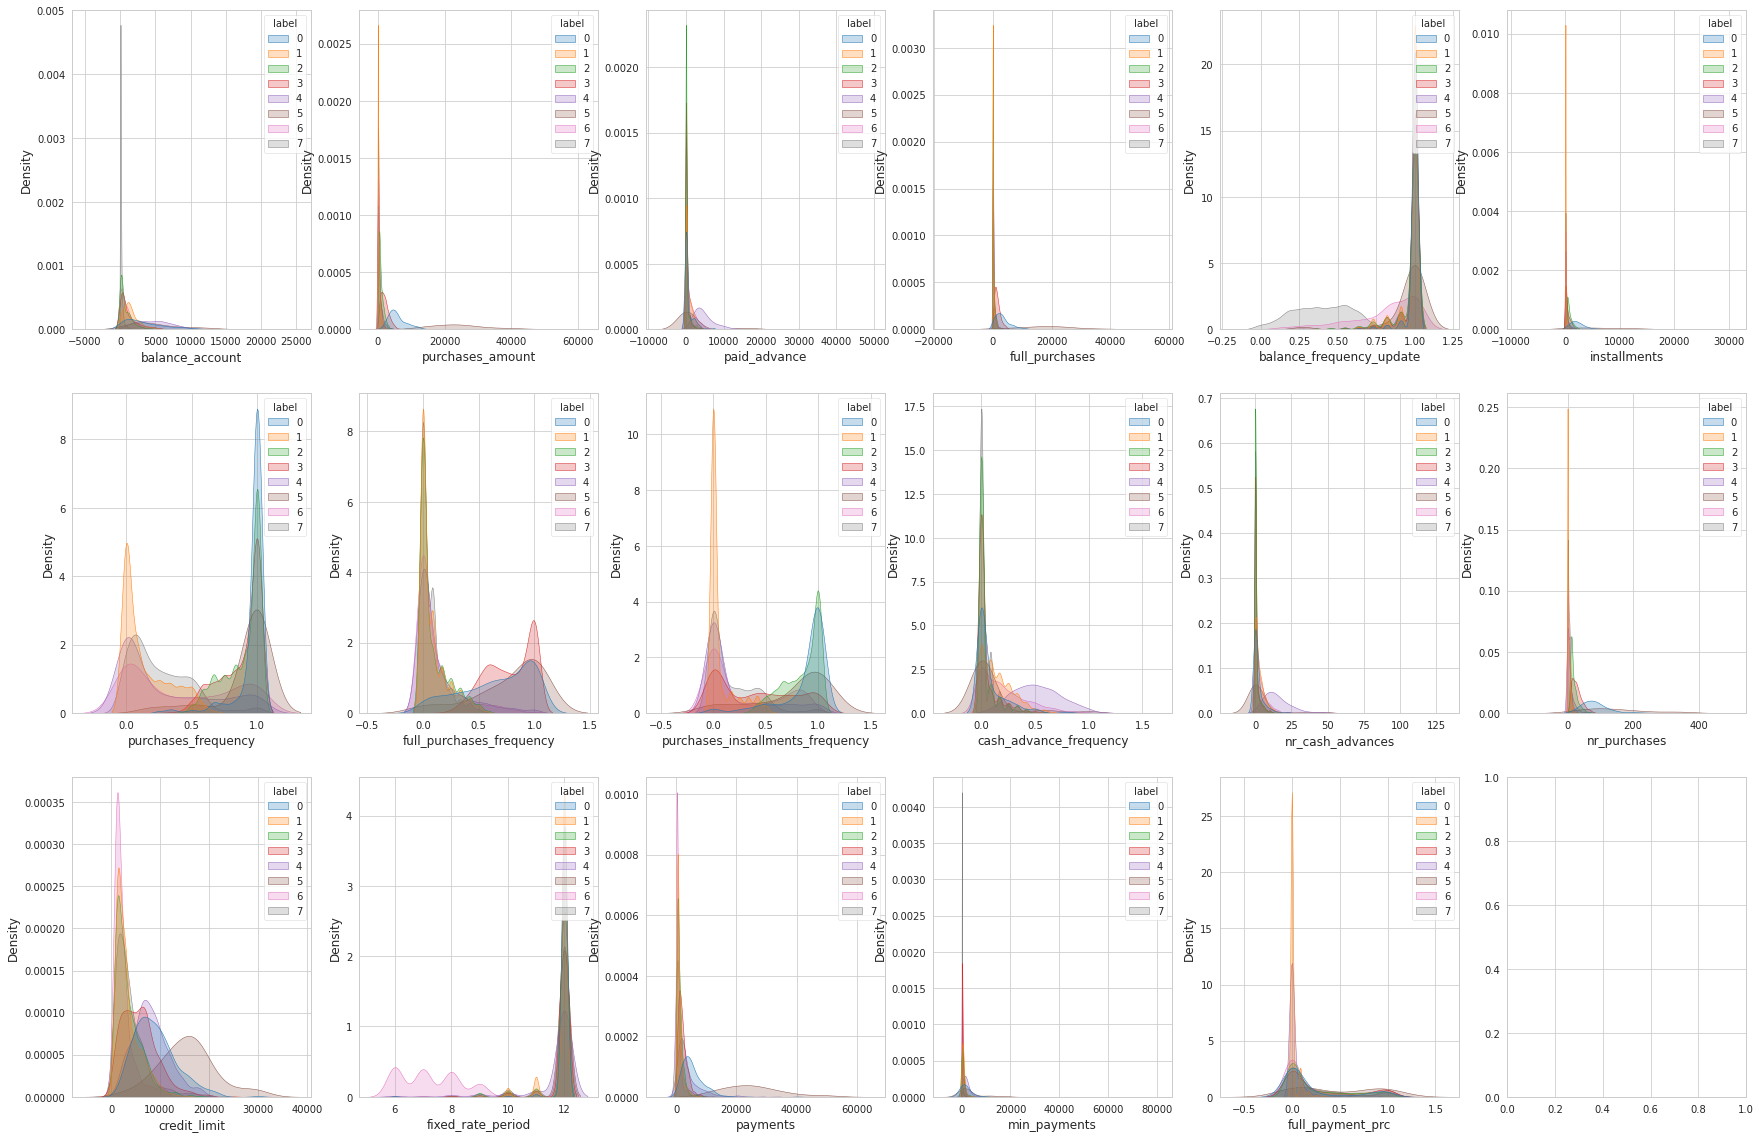

In [32]:
def plot_dist(df, label_col: str):
  """Utility function to plot distributions
  for all features."""
  fig, axes = plt.subplots(3, 6, figsize=(30, 20))
  for col, ax in zip(features, axes.ravel()[:17]):
    sns.kdeplot(data=df, x=col, hue=label_col, common_norm=False, shade=True, ax=ax)
  plt.show()

plot_dist(df_ex1, 'label')

In [33]:
label_means = df_ex1.groupby('label').mean()
label_means /= label_means.max(axis=0)
label_means.style.highlight_max(color='lightgreen', axis=0).highlight_min(color='orange', axis=0)

,balance_account,purchases_amount,paid_advance,full_purchases,balance_frequency_update,installments,purchases_frequency,full_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,min_payments,full_payment_prc
label,,,,,,,,,,,,,,,,,
0,0.655851,0.230940,0.125676,0.184247,1.000000,0.356585,1.000000,0.849024,1.000000,0.155629,0.129996,0.574394,0.579001,1.000000,0.215160,0.637053,0.440885
1,0.283365,0.009512,0.147727,0.010322,0.986099,0.007364,0.153072,0.106558,0.074674,0.289750,0.180445,0.018236,0.215563,0.992817,0.039348,0.239092,0.042276
2,0.145526,0.037199,0.043723,0.010662,0.967650,0.108546,0.929336,0.116506,0.969527,0.079672,0.050565,0.131154,0.227843,0.990931,0.044196,0.217140,0.505537
3,0.213242,0.081770,0.050239,0.089669,0.982524,0.060552,0.915034,0.997732,0.464557,0.092793,0.055572,0.191068,0.376655,0.991908,0.080004,0.130132,0.605429
4,0.893070,0.020360,1.000000,0.017355,0.983882,0.028450,0.306328,0.179838,0.221234,1.000000,1.000000,0.052827,0.520139,0.970983,0.153636,0.587973,0.075434
5,1.000000,1.000000,0.369918,1.000000,0.969072,1.000000,0.951791,1.000000,0.866742,0.160630,0.226949,1.000000,1.000000,0.997007,1.000000,1.000000,1.000000
6,0.152642,0.015555,0.224240,0.012892,0.807505,0.022774,0.433399,0.151645,0.320505,0.380036,0.204244,0.034382,0.156541,0.604763,0.023456,0.092109,0.341806
7,0.020845,0.013483,0.067916,0.011182,0.395241,0.019705,0.262962,0.091619,0.198426,0.065555,0.047022,0.027808,0.247837,0.984818,0.046313,0.041047,0.515782


#### Descrition of clusters
0:
- 3rd largest full_purchases and purchases_amount

**1:**
- **dominant group (61%) with purchase_amount=0 and payments > 0, i.e., paying only using cash advances (short term loans)**. Other groups are 6 (20%), 7 (10%) and 5 (10%).

2:
- "medium" nr_purchases, purchases_amount, and installements. Only group 3 has (significantly) higher values for these 3 features and the distribution is also very spreaded. All other groups have significantly smaller values for these 3 features.

**3:**
- **By far largest credit limit, payments, full_purchases, and purchases_amount.**

4:


**5:**
- balance_frequency_update between 0-0.75. All other groups are mostly between 0.75-1

**6:**
- **Largest cash_advance_frequency, nr_cash_advances, and paid_advances**

**7:**
- **fixed_rate_period evenly between ~5 to 9 months. All others peak at 12 months**
- **narrow credit_limit peak at 0**

**Groups**<br>
2, 3, 7:
- High full_purchase_frequency

credit_limit:
- High: 3
- medium: 0, 2, 6
- low: 1, 4, 5, 7

# Experiment 2: StandardScaler -> PCA -> KMeans

In [34]:
from sklearn.decomposition import PCA

df_ex2 = df_clean.copy()

# we'll need to do inverse_transform,
# so defining a transformer will make it easier
transformer = Pipeline(steps=[
                              ('scaler', StandardScaler()),
                              ('dim_red', PCA()),
])

pipeline_pca_kmean = Pipeline(steps=[
                                      ('trans', transformer),
                                      ('clust', KMeans(n_clusters=6))
])

In [35]:
pipeline_pca_kmean.fit(X_train)

Pipeline(steps=[('trans',
                 Pipeline(steps=[('scaler', StandardScaler()),
                                 ('dim_red', PCA())])),
                ('clust', KMeans(n_clusters=6))])

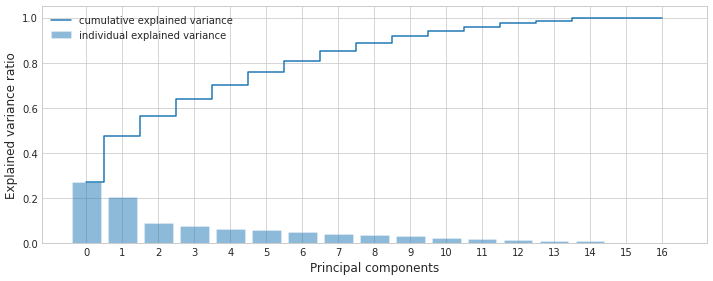

In [37]:
# From Eduardo's notebook

pca = pipeline_pca_kmean['trans']['dim_red']

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10, 4))

    plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_.cumsum(), where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.xticks(range(0,len(pca.explained_variance_ratio_),1))
    plt.tight_layout()
    
plt.show()

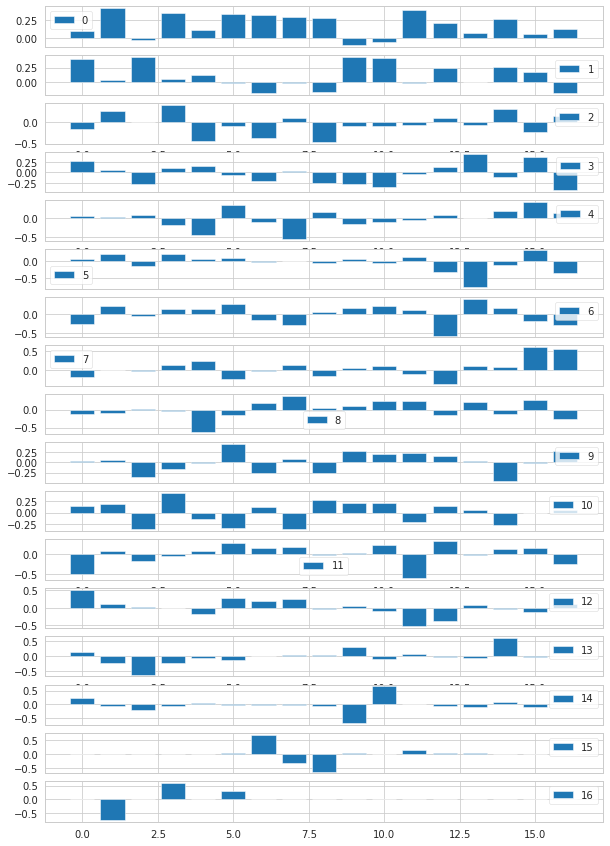

In [38]:
# Visualizing the PCA coefficients

fig, axes = plt.subplots(pca.n_components_, 1, figsize=(10, 15))
for i, ax in enumerate(axes.ravel()):
  ax.bar(list(range(pca.n_features_)), pca.components_[i], label=str(i))
  ax.legend()
plt.show()

In [39]:
def compute_labels(pipeline, X, n_clusters):
  """Return a matrix with shape (len(n_clusters), len(X))
  with labels for different n_clusters.
  """
  labels_mat = np.zeros((len(n_clusters), len(X)))
  for i, n_cluster in enumerate(n_clusters):
    pipeline.set_params(clust__n_clusters=n_cluster)
    pipeline.fit(X)
    labels_mat[i] = pipeline['clust'].labels_
  return labels_mat

In [40]:
# Compute labels for different number of clusters
# for the base and improved models
# to investigate the cluster distributions.

# After experimentations with the following distribution plots,
# 6 PCA components seems to give the best results.
pipeline_pca_kmean.set_params(
  trans__dim_red__n_components=6,
  clust__n_init=10,
  clust__random_state=42
)

n_clusters = np.arange(3, 7, 1)
labels_mat = compute_labels(pipeline_pca_kmean, X_train, n_clusters)
labels_mat_base = compute_labels(pipeline_base_kmean, X_train, n_clusters)

In [41]:
def compare_labels(df, feature, labels, n_clusters, ylim):
  """Compare features distributions for different labels
  from different number of clusters.
  """
  fig, axes = plt.subplots(1, labels.shape[0], figsize=(5 * labels.shape[0], 5))
  for n_cluster, labels_, ax in zip(n_clusters, labels, axes.ravel()):
    sns.kdeplot(data=df, x=feature, hue=[str(l) for l in labels_],
                common_norm=False, shade=True, ax=ax)
    ax.set_title(f'n_clusters={n_cluster}')
    ax.set_ylim(ylim)
  plt.show()

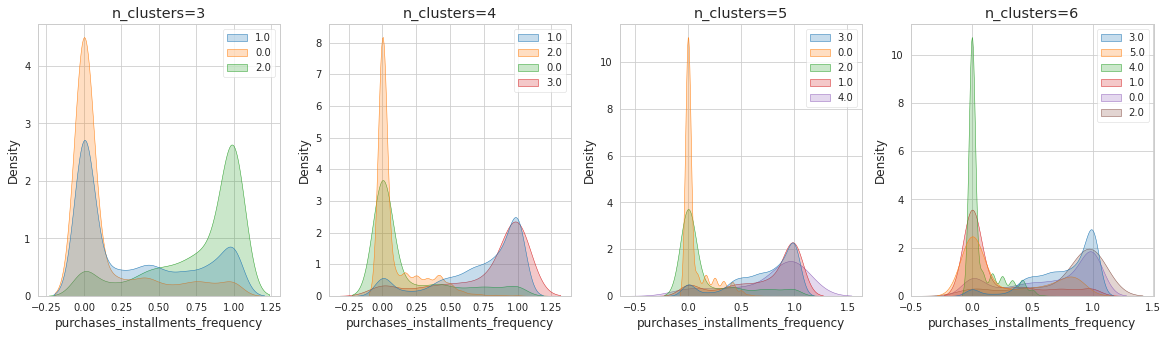

In [42]:
compare_labels(
    df_clean, 'purchases_installments_frequency', labels_mat, n_clusters, None)

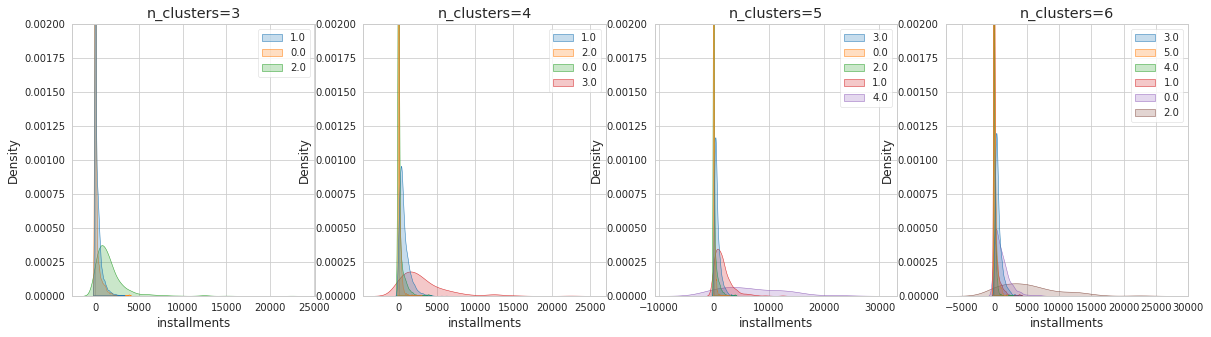

In [43]:
compare_labels(df_clean, 'installments', labels_mat, n_clusters, [0, 0.002])

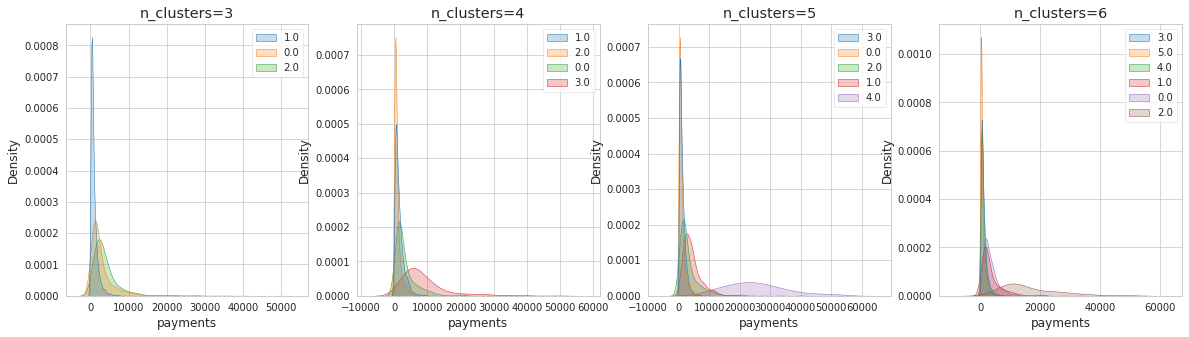

In [44]:
compare_labels(df_clean, 'payments', labels_mat, n_clusters, None)

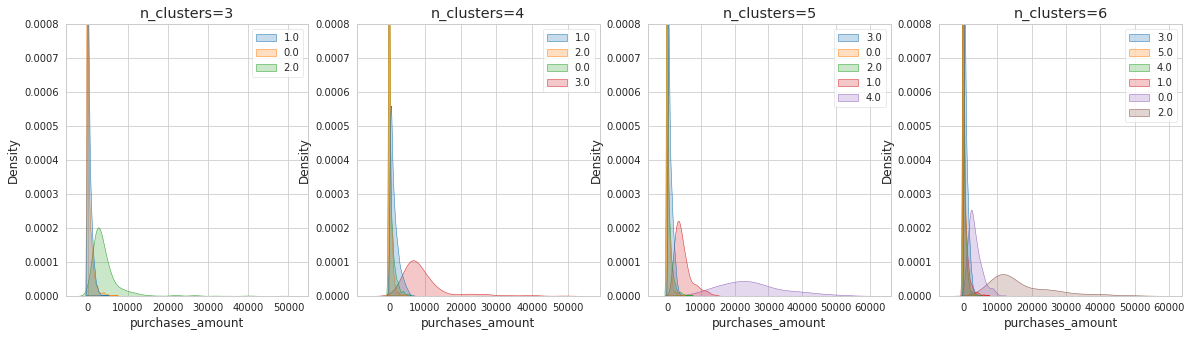

In [45]:
compare_labels(
    df_clean, 'purchases_amount', labels_mat, n_clusters, [0, 0.0008])

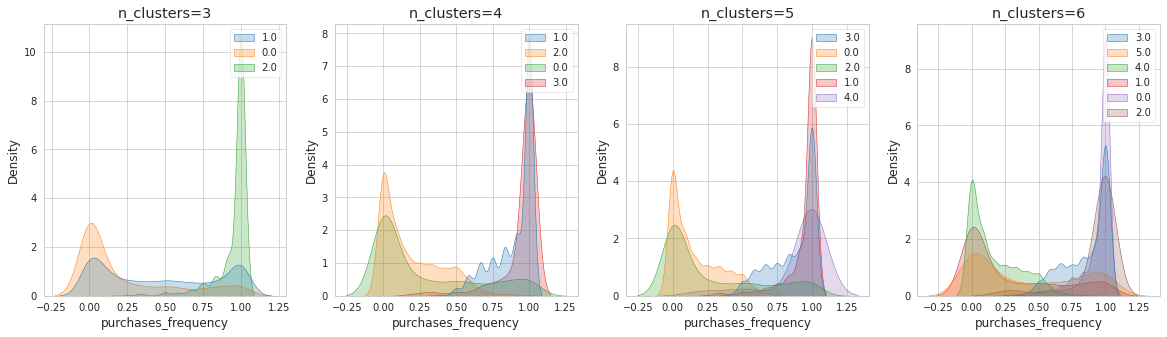

In [46]:
compare_labels(df_clean, 'purchases_frequency', labels_mat, n_clusters, None)

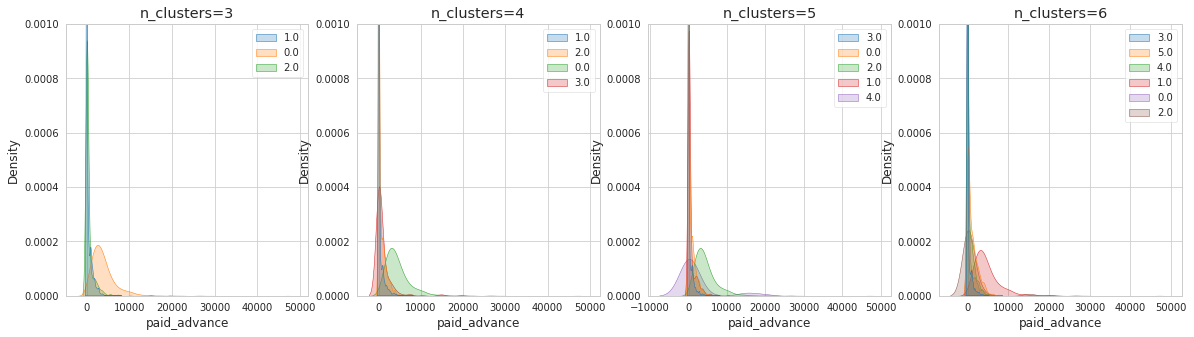

In [47]:
compare_labels(df_clean, 'paid_advance', labels_mat, n_clusters, [0, 0.001])

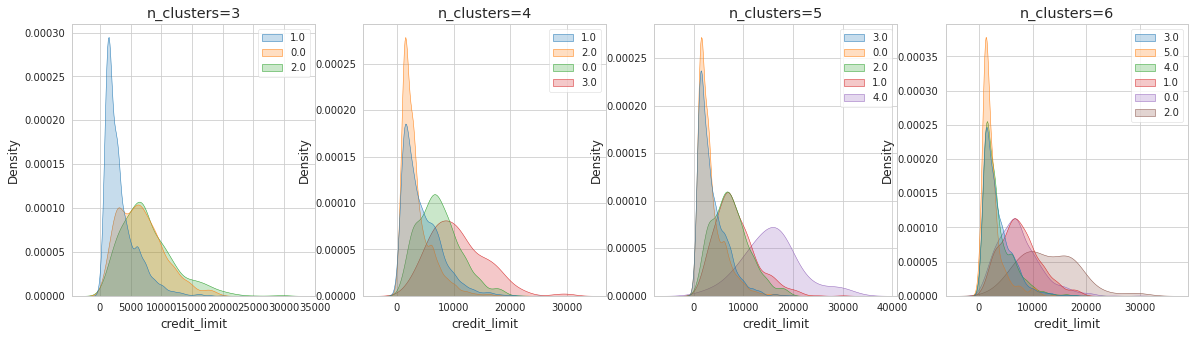

In [48]:
# clusters for credit limit for the improved model
compare_labels(df_clean, 'credit_limit', labels_mat, n_clusters, None)

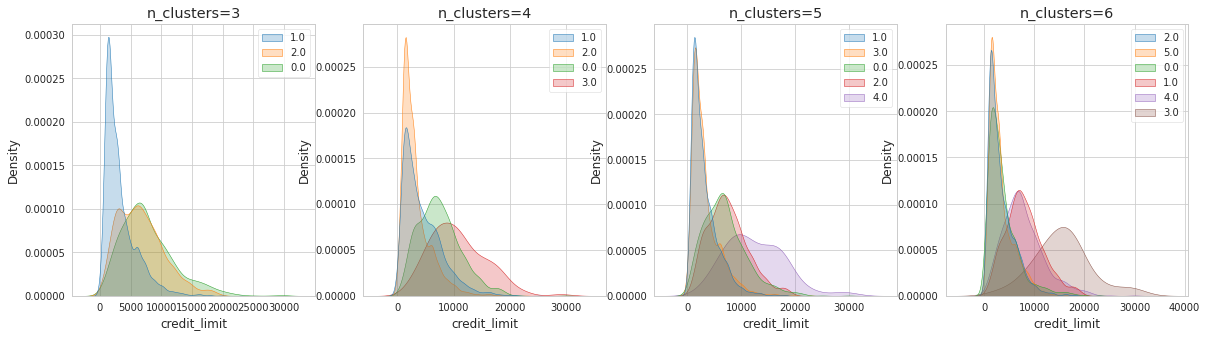

In [49]:
# clusters for credit limit for the base model
compare_labels(df_clean, 'credit_limit', labels_mat_base, n_clusters, None)

From the last two plots for n_clusters=5, we can see that PCA helps separating clusters, in particular by defining a group with very high credit limit.

It looks like 5 clusters with PCA(n_components=6) is optimal.

# Confirming the optimal number of clusters using the elbow plot and silhouette method

In [50]:
from sklearn.metrics import silhouette_score

In [51]:
n_clusters = np.arange(2, 14, 1)

wcss = np.zeros_like(n_clusters).astype('float64')
sil_scores = np.zeros_like(n_clusters).astype('float64')

for i, n_cluster in enumerate(n_clusters):
  pipeline_pca_kmean.set_params(
      trans__dim_red__n_components=6,
      clust__n_clusters=n_cluster,
      clust__n_init=10,
      clust__random_state=42
  )
  cluster_labels = pipeline_pca_kmean.fit_predict(X_train)
  wcss[i] = pipeline_pca_kmean['clust'].inertia_
  sil_scores[i] = silhouette_score(
      X_train, cluster_labels)

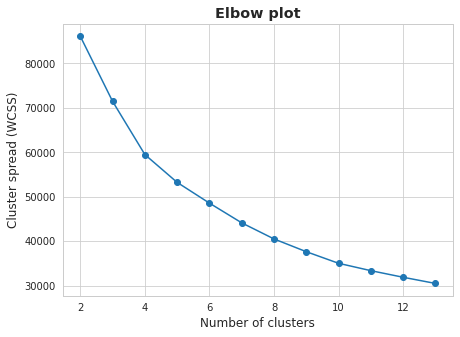

In [52]:
fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(n_clusters, wcss, '-o')
ax.set(
    xlabel='Number of clusters',
    ylabel='Cluster spread (WCSS)',
)
ax.set_title('Elbow plot', fontweight='bold')
ax.set_xticks(list(range(2, 13, 2)))
plt.show()

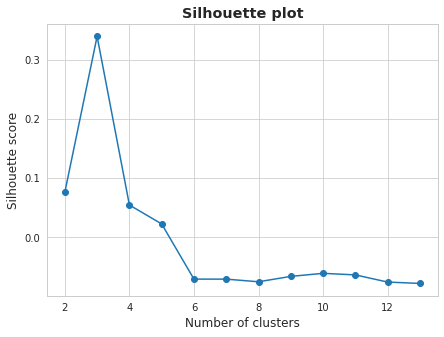

In [53]:
fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(n_clusters, sil_scores, '-o')
ax.set(
    xlabel='Number of clusters',
    ylabel='Silhouette score',
)
ax.set_title('Silhouette plot', fontweight='bold')
ax.set_xticks(list(range(2, 13, 2)))
# fig.savefig(
#     '/content/drive/MyDrive/silhouette_score.png',
#     bbox_inches='tight',
#     dpi=600
# )
plt.show()

- From the elbow plot, 5 to 7 clusters seems optimal, but it's not so clear.
- Fromt the silhouette plot, 3 clusters is optimal. However, 4 and 5 clusters still give a positive score.
- As seen with the distribution plots, 5 cluster defines an additional high credit limit group which is interesting.
- 3 cluster is a conservative choice which minimzes overlapping between clusters.
- For the analysis, we'll go with 5 because of the additional high credit rating group.

# Interpretation of clusters from the StandardScaler -> PCA(6) -> KMeans(5) pipeline

In [64]:
pipeline_pca_kmean.set_params(
      trans__dim_red__n_components=6,
      clust__n_clusters=5,
      clust__n_init=10,
      clust__random_state=42
)

pipeline_pca_kmean.fit(X_train)
labels = pipeline_pca_kmean['clust'].labels_

# we also add the groups with 3 clusters (conservative choice)
pipeline_pca_kmean.set_params(
      trans__dim_red__n_components=6,
      clust__n_clusters=3,
      clust__n_init=10,
      clust__random_state=42
)

pipeline_pca_kmean.fit(X_train)
labels_3 = pipeline_pca_kmean['clust'].labels_

In [65]:
df_final = df_clean.copy()

df_final['label'] = labels
df_final['label'] = df_final['label'].astype('category')

df_final['label_3'] = labels_3
df_final['label_3'] = df_final['label_3'].astype('category')

In [58]:
# group proportions of customers using the credit card
# only for cash advances
df_cashadv = df_final[(df_final['purchases_amount'] == 0) & (df_final['payments'] > 0)]
print(df_cashadv['label'].value_counts(normalize=True))

0    0.7188
2    0.2812
4    0.0000
3    0.0000
1    0.0000
Name: label, dtype: float64


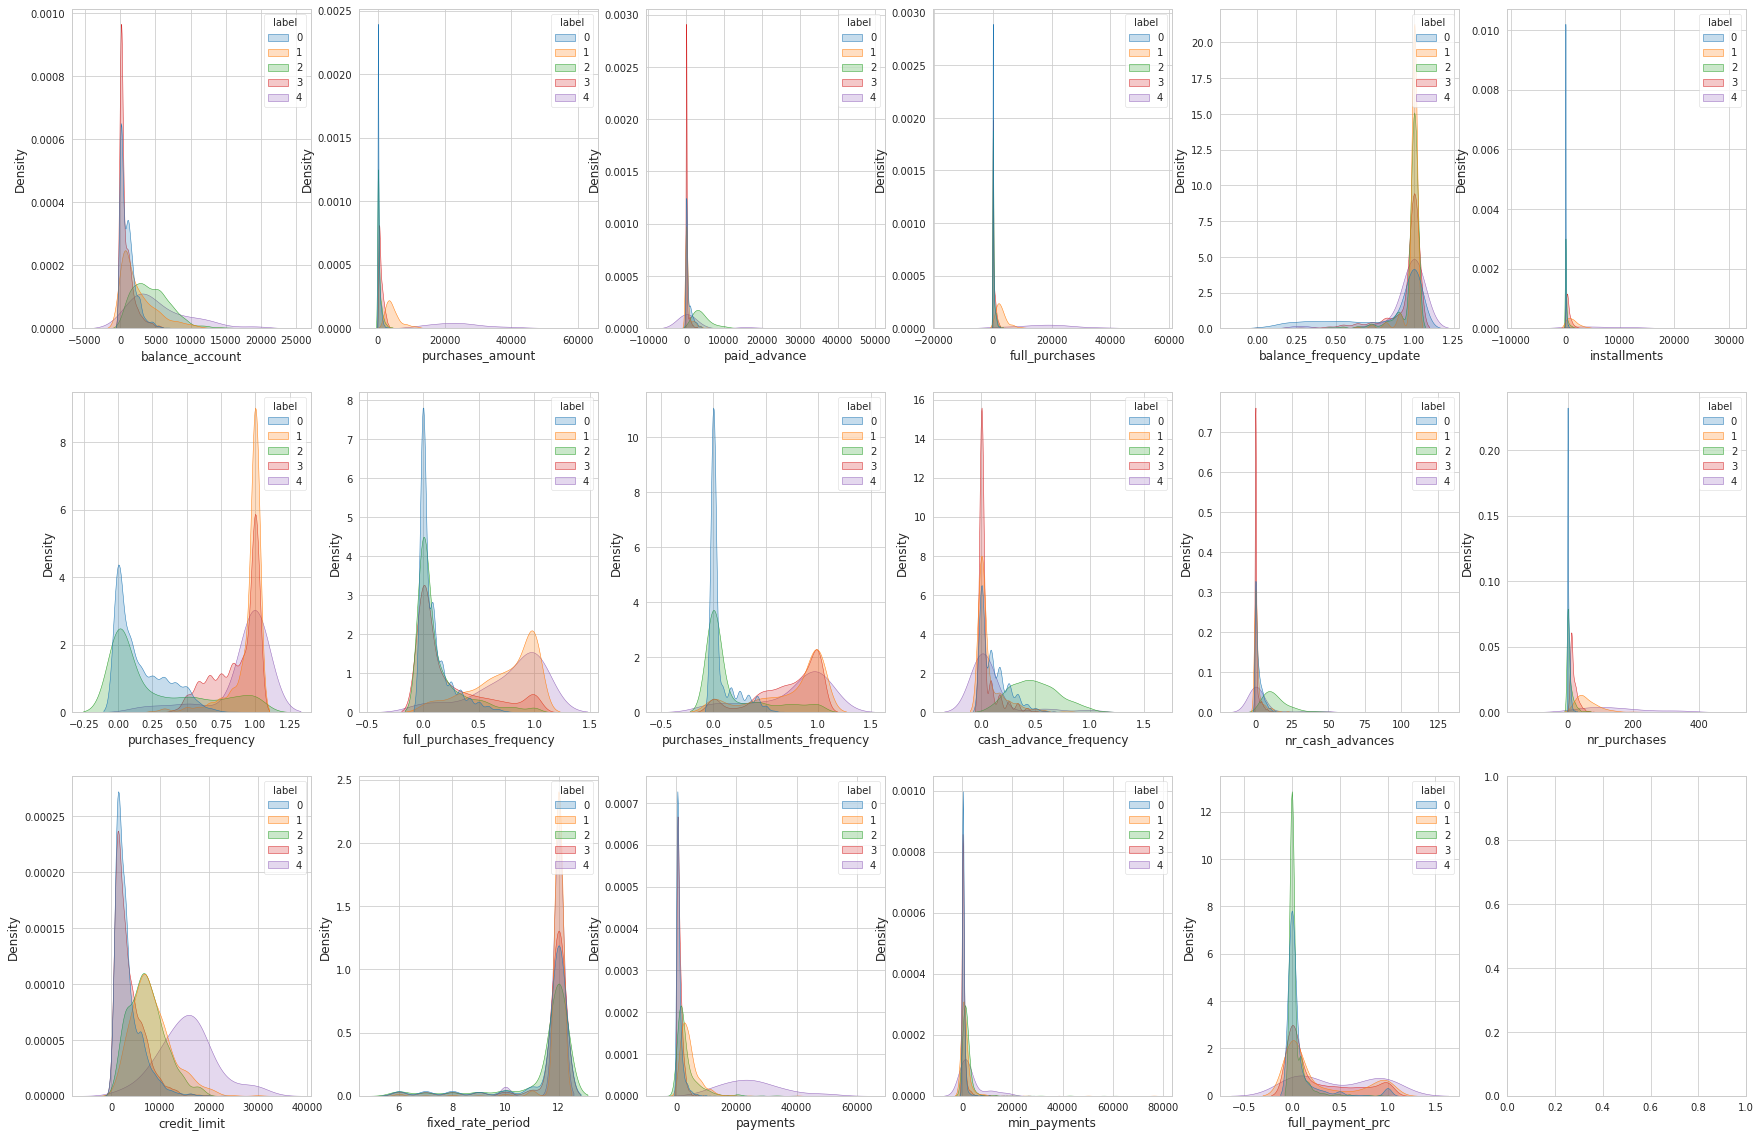

In [59]:
sns.set_style('whitegrid')
plot_dist(df_final, 'label')

#### Descrition of clusters
0 (ONLY CASH LOAN):
- dominant group (72%) with purchase_amount=0 and payments > 0, i.e., paying only using cash advances (short term loans). Other group is 4 (28%)

1 (MEDIUM PROFILE):
- medium credit limit (same as group 2)
- only group with medium purchase amount
- 2nd largest full_purchases
- 2nd largest nr_purchases

2 (LARGEST CASH LOAN MEDIUM PURCHASES):
- Largest cash_advance_frequency, nr_cash_advances, and paid_advances

3 (LOW PROFILE):
- 3rd largest nr_purchases
- 3rd largest installments

4 (PREMIUM):
- Largest credit limit, payments, full_purchases, and purchases_amount.

**Groups**<br>
purchase_frequency:
- High: 0, 1, 3
- Low: 2, 4

full_purchases_frequency:
- High: 1, 3
- Low: 0, 2, 4

purchases_installment_frequency:
- High: 0, 1, 3
- Low: 2, 4

balance_account (not clear, a lot of overlap):
- High: 1, 3
- Low: 0, 2, 4

full_purchases:
- High: 3
- Medium: 1 
- Low: 0, 2, 4

credit_limit:
- High: 3
- medium: 1, 4
- low: 0, 2

purchases_amount:
- High: 3
- Medium: 1
- Low-U: 0
- Low-L: 2, 4

cash_advance_frequency:
- High: 4
- Low: 0, 1, 2, 3

In [66]:
# name the clusters

groups = {
    0: 'cash-low',
    1: 'medium',
    2: 'cash-premium',
    3: 'low',
    4: 'premium',
}

groups_3 = {
    0: 'cash',
    1: 'low',
    2: 'frequent/premium'
}

df_final['group'] = df_final['label'].apply(lambda x: groups[x])
df_final['group_3'] = df_final['label_3'].apply(lambda x: groups_3[x])

In [67]:
df_final.to_csv('/content/drive/MyDrive/card_transactions_labeled.csv')

In [68]:
def scatter(feat_1, feat_2, df, label_col, ax=None, title=None, s=15):
  if not ax:
    fig, ax = plt.subplots(figsize=(7, 7))
  else:
    fig = None
  sns.scatterplot(
      data=df, x=feat_1, y=feat_2, hue=label_col,
      s=s, alpha=.7, ax=ax)
  ax.set_title(title)
  return fig, ax

(None, <matplotlib.axes._subplots.AxesSubplot at 0x7f5448a75a90>)

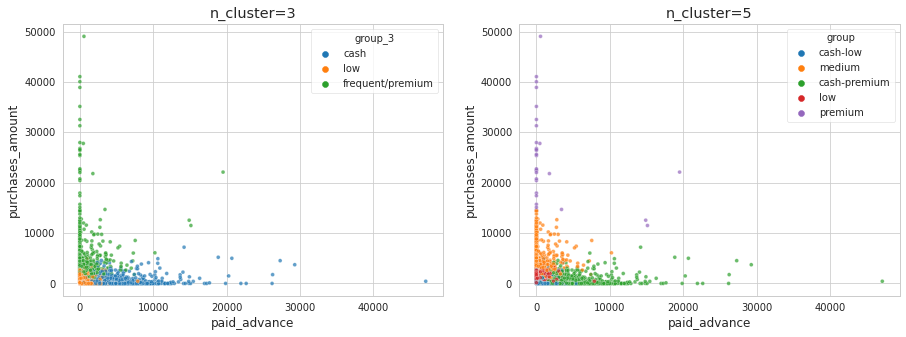

In [72]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
scatter('paid_advance', 'purchases_amount', df_final, 'group_3', ax=axes[0], title='n_cluster=3')
scatter('paid_advance', 'purchases_amount', df_final, 'group', ax=axes[1], title='n_cluster=5')

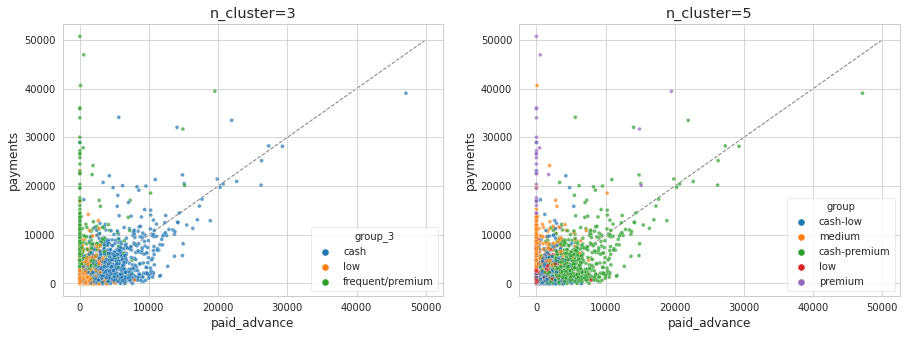

In [73]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
scatter('paid_advance', 'payments', df_final, 'group_3', ax=axes[0], title='n_cluster=3')
scatter('paid_advance', 'payments', df_final, 'group', ax=axes[1], title='n_cluster=5')
axes[0].plot([0, 50000], [0, 50000], '--', color='gray', linewidth=1, zorder=0)
axes[1].plot([0, 50000], [0, 50000], '--', color='gray', linewidth=1, zorder=0)

(None, <matplotlib.axes._subplots.AxesSubplot at 0x7f5448468dd0>)

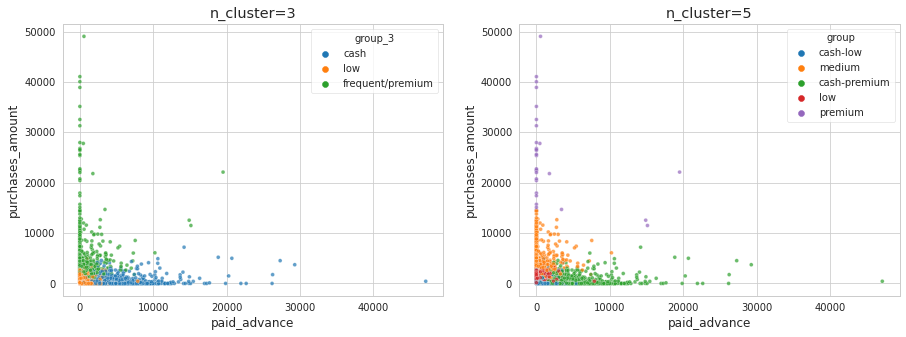

In [75]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
scatter('paid_advance', 'purchases_amount', df_final, 'group_3', ax=axes[0], title='n_cluster=3')
scatter('paid_advance', 'purchases_amount', df_final, 'group', ax=axes[1], title='n_cluster=5')

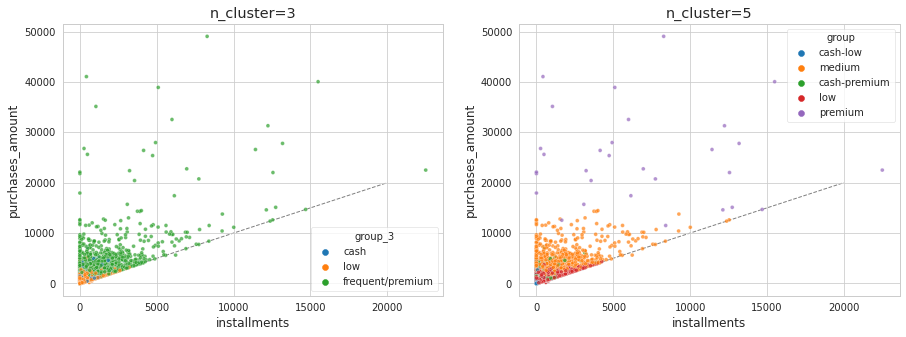

In [76]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
scatter('installments', 'purchases_amount', df_final, 'group_3', ax=axes[0], title='n_cluster=3')
scatter('installments', 'purchases_amount', df_final, 'group', ax=axes[1], title='n_cluster=5')
axes[0].plot([0, 20000], [0, 20000], '--', color='gray', linewidth=1, zorder=0)
axes[1].plot([0, 20000], [0, 20000], '--', color='gray', linewidth=1, zorder=0)

(None, <matplotlib.axes._subplots.AxesSubplot at 0x7f5448284750>)

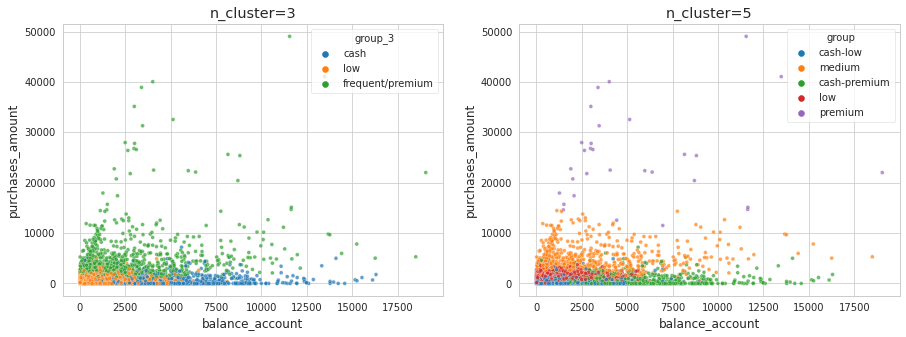

In [77]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
scatter('balance_account', 'purchases_amount', df_final, 'group_3', ax=axes[0], title='n_cluster=3')
scatter('balance_account', 'purchases_amount', df_final, 'group', ax=axes[1], title='n_cluster=5')

# Final figures

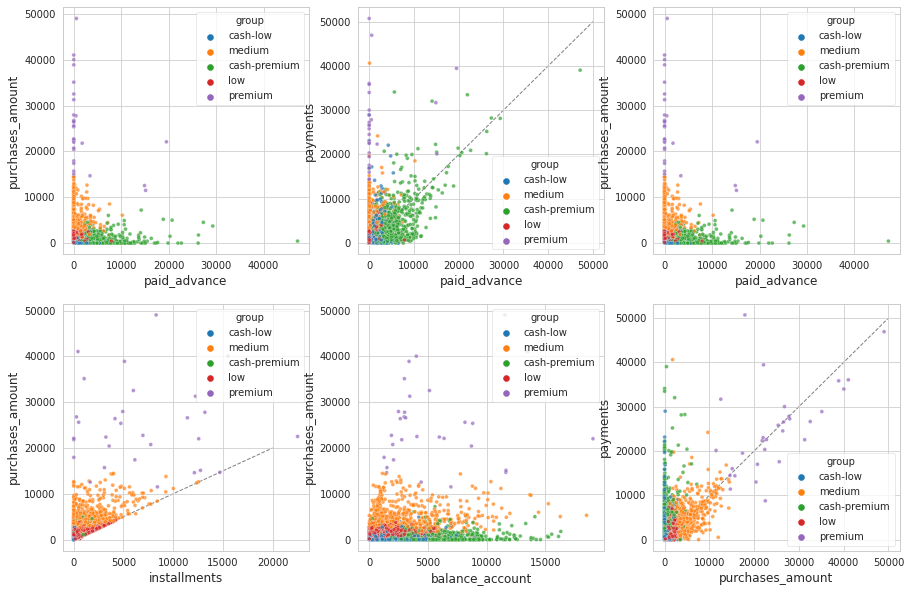

In [85]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
scatter('paid_advance', 'purchases_amount', df_final, 'group', ax=axes[0, 0])

scatter('paid_advance', 'payments', df_final, 'group', ax=axes[0, 1])
axes[0, 1].plot([0, 50000], [0, 50000], '--', color='gray', linewidth=1, zorder=0)

scatter('paid_advance', 'purchases_amount', df_final, 'group', ax=axes[0, 2])

scatter('installments', 'purchases_amount', df_final, 'group', ax=axes[1, 0])
axes[1, 0].plot([0, 20000], [0, 20000], '--', color='gray', linewidth=1, zorder=0)

scatter('balance_account', 'purchases_amount', df_final, 'group', ax=axes[1, 1])

scatter('purchases_amount', 'payments', df_final, 'group', ax=axes[1, 2])
axes[1, 2].plot([0, 50000], [0, 50000], '--', color='gray', linewidth=1, zorder=0)

In [86]:
colors = {
    'cash-premium': 'gray',
    'cash': 'red',
    'cash-low': 'red',
    'low': 'blue',
    'medium': 'green',
    'premium': 'orange',
    'frequent/premium': 'orange',
}

In [87]:
from matplotlib.lines import Line2D

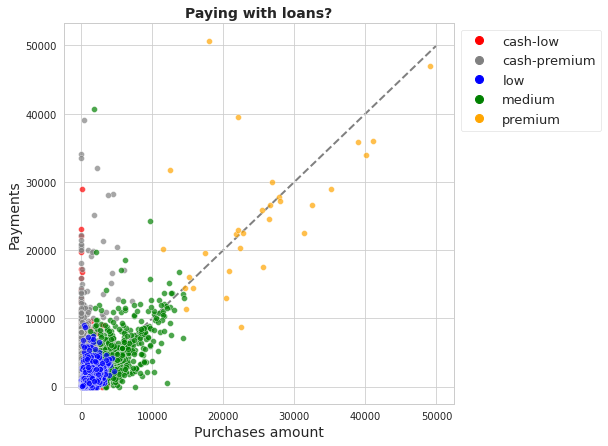

In [88]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))

labels = ['cash-low', 'cash-premium', 'low', 'medium', 'premium']
groups = df_final.groupby('group')
zorders = [100, 101, 105, 104, 103]

for i, label in enumerate(labels):
  df = groups.get_group(label)
  sns.scatterplot(
      x='purchases_amount', y='payments', color=colors[label], data=df,
      ax=ax, s=35, zorder=zorders[i], alpha=.7
  )
ax.plot([0, 50000], [0, 50000], '--', color='gray', linewidth=2, zorder=0)

ax.set_xlabel('Purchases amount', fontsize=14)
ax.set_ylabel('Payments', fontsize=14)
ax.set_title('Paying with loans?', fontweight='bold', fontsize=14)

legend_elements = [
  Line2D([0], [0], marker='o', color=colors[x], linewidth=0, markersize=8)
  for x in labels
]
ax.legend(
  handles=legend_elements,
  labels=labels,
  fontsize=13,
  bbox_to_anchor=(1, 1))

fig.savefig(
    '/content/drive/MyDrive/purchases.png',
    bbox_inches='tight',
    dpi=600
)

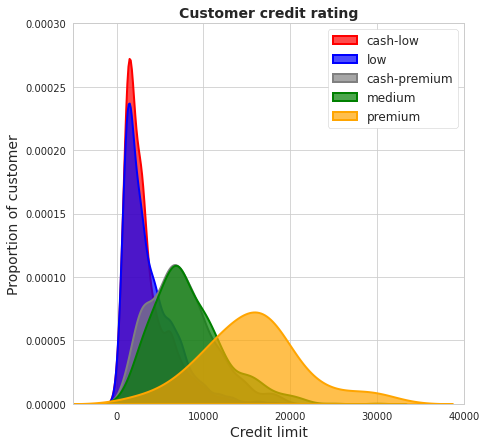

In [89]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))

labels = ['cash-low', 'low', 'cash-premium', 'medium', 'premium']
groups = df_final.groupby('group')

for i, label in enumerate(labels):
  df = groups.get_group(label)
  sns.kdeplot(
      x='credit_limit', color=colors[label], data=df,
      shade=True, ax=ax, alpha=.7, linewidth=2
  )

ax.set_xticks([10000 * i for i in range(5)])
ax.set_xlim([-5000, 40000])
ax.set_ylim([0, 0.0003])

ax.set_xlabel('Credit limit', fontsize=14)
ax.set_ylabel('Proportion of customer', fontsize=14)
ax.set_title('Customer credit rating', fontweight='bold', fontsize=14)
ax.legend(
  labels=labels,
  fontsize=12, 
  bbox_to_anchor=(1, 1),
  framealpha=1,
)
fig.savefig(
    '/content/drive/MyDrive/credit_rating.png',
    bbox_inches='tight',
    dpi=800
)
None

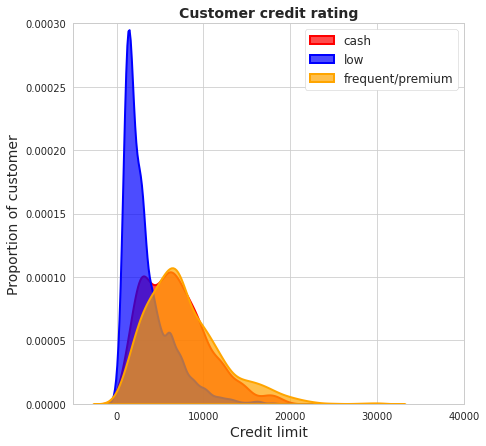

In [90]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))

labels = ['cash', 'low', 'frequent/premium']
groups = df_final.groupby('group_3')

for i, label in enumerate(labels):
  df = groups.get_group(label)
  sns.kdeplot(
      x='credit_limit', color=colors[label], data=df,
      shade=True, ax=ax, alpha=.7, linewidth=2
  )

ax.set_xticks([10000 * i for i in range(5)])
ax.set_xlim([-5000, 40000])
ax.set_ylim([0, 0.0003])

ax.set_xlabel('Credit limit', fontsize=14)
ax.set_ylabel('Proportion of customer', fontsize=14)
ax.set_title('Customer credit rating', fontweight='bold', fontsize=14)
ax.legend(
  labels=labels,
  fontsize=12, 
  bbox_to_anchor=(1, 1),
  framealpha=1,
)
fig.savefig(
    '/content/drive/MyDrive/credit_rating_3.png',
    bbox_inches='tight',
    dpi=800
)
None